In [3]:
import sys ; sys.path.insert(0, '../')
from notebook_tools import *
import matplotlib.mlab as mlab
import matplotlib.ticker as ticker
%matplotlib inline

In [6]:
import scipy.stats as st

In [128]:
a = np.random.normal(0.053,0.015,5000) +np.random.normal(0.053,0.025,5000) + np.random.normal(.014,0.0012,5000) + np.random.uniform(0.015,0.0154,5000)

In [129]:
def interval_68_from_start_point( start_x = -np.inf, dx=0.001 , debug=0):
    '''
    return the end point of the 68% interval starting at start_x
    '''
    end_x = start_x
    frac = 0
    N_tot = len(a[a<np.inf])
    step = 0
    while( frac < 0.68 ):#{
        end_x = end_x + dx
        N_start_end = len(a[(a>start_x)&(a<end_x)])
        frac = float(N_start_end)/N_tot
        step += 1
        if step>1000: break
    #}
    if debug: print 'frac:',frac
    return end_x

def find_smallest_interval( a=None, dx=0.001 ):
    l_interval = 10000
    for start_x in np.arange(np.min(a),np.mean(a)+np.std(a),dx):
        end_x = interval_68_from_start_point(start_x,dx=dx)

        if ((end_x-start_x) < l_interval):
            l_interval = end_x-start_x
            interval = [start_x,end_x]
    return interval

In [130]:
interval = find_smallest_interval(a=a,dx=0.001)

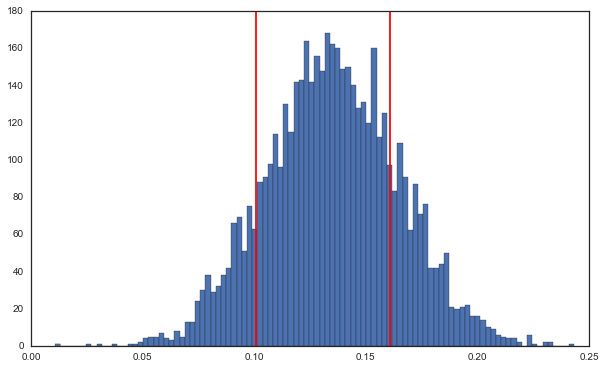

In [131]:
fig,ax = plt.subplots(figsize=(10,6))
plt.hist(a,bins=100);
plt.plot([interval[0],interval[0]],ax.get_ylim(),'-',color='red')
plt.plot([interval[1],interval[1]],ax.get_ylim(),'-',color='red')